Data Loading and Cleaning

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
# Upload the file first in Colab using this method
from google.colab import files
uploaded = files.upload()

# Reading the uploaded CSV file
df = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows of the dataset
df.head()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Descriptive Statistics

In [ ]:
# Calculate the mean of numerical columns
mean_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean()
print("Mean Values:\n", mean_values)

# Calculate the median of numerical columns
median_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median()
print("\nMedian Values:\n", median_values)

# Calculate the mode of categorical columns
mode_gender = df['Gender'].mode()[0]
mode_product_category = df['Product Category'].mode()[0]
print("\nMode of Gender:", mode_gender)
print("Mode of Product Category:", mode_product_category)

# Calculate the standard deviation of numerical columns
std_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std()
print("\nStandard Deviation Values:\n", std_values)


Mean Values:
 Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median Values:
 Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode of Gender: Female
Mode of Product Category: Clothing

Standard Deviation Values:
 Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


Time Series Analysis

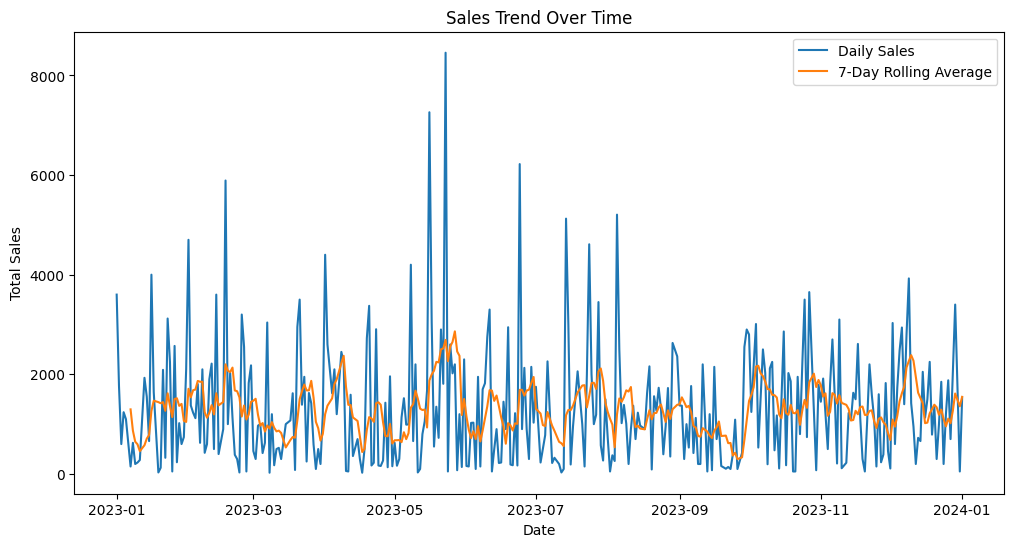

In [ ]:
import pandas as pd
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Group sales by date and calculate total sales for each day
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Analyze sales trends over time using time series techniques
# You can use various techniques like moving average, decomposition, ARIMA, etc.
# Here's an example using a rolling average:

# Calculate a 7-day rolling average of daily sales
rolling_avg = daily_sales.rolling(window=7).mean()

# Plot the daily sales and the rolling average
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_avg, label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Further analysis could include:
# - Decomposition of the time series into trend, seasonality, and residual components.
# - Forecasting future sales using ARIMA or other time series models.
# - Identifying seasonal patterns and trends in sales.


Customer and Product Analysis


Average Spending by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Average Spending by Age Group:
 Age Group
0-18     534.047619
19-30    483.055556
31-45    468.498350
46-60    446.752266
60+      357.258065
Name: Total Amount, dtype: float64

Product Category Popularity by Gender:
 Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               418       441          439
Male                 353       453          410

Customer Purchase Frequency:
 Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: Date, Length: 1000, dtype: int64


<ipython-input-10-a5c32b03e0d6>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age Group')['Total Amount'].mean()


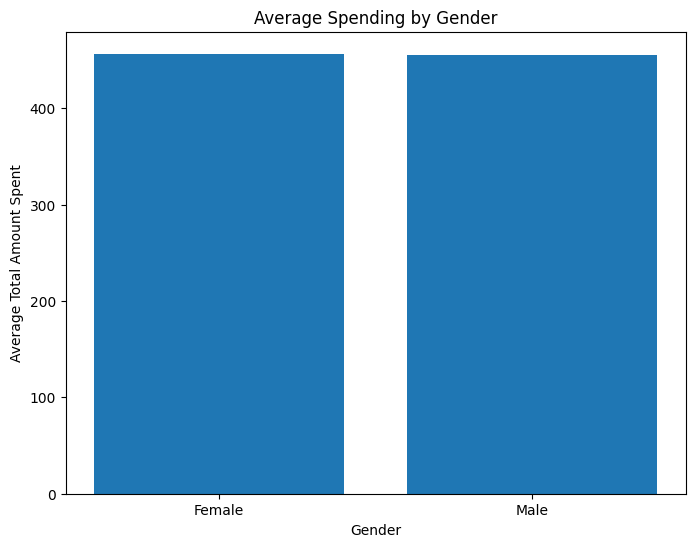

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Analyze customer demographics and purchasing behavior

# Group data by gender and calculate the average total amount spent by each gender
gender_spending = df.groupby('Gender')['Total Amount'].mean()
print("\nAverage Spending by Gender:\n", gender_spending)

# Group data by age group and calculate the average total amount spent by each age group
# You can define age groups using bins or other methods
bins = [0, 18, 30, 45, 60, 100]  # Example age group bins
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_spending = df.groupby('Age Group')['Total Amount'].mean()
print("\nAverage Spending by Age Group:\n", age_group_spending)

# Analyze the most popular product categories among different customer segments
# You can group by gender, age group, or other relevant factors
product_category_by_gender = df.groupby(['Gender', 'Product Category'])['Quantity'].sum().unstack()
print("\nProduct Category Popularity by Gender:\n", product_category_by_gender)

# You can also analyze the purchase frequency of different customer segments
# For example, you can group by customer ID and count the number of purchases they made
customer_purchase_frequency = df.groupby('Customer ID')['Date'].count()
print("\nCustomer Purchase Frequency:\n", customer_purchase_frequency)

# Visualize the customer demographics and purchasing behavior
# You can create bar charts, histograms, scatter plots, etc.
# For example, you can visualize the average spending by gender using a bar chart:

plt.figure(figsize=(8, 6))
plt.bar(gender_spending.index, gender_spending.values)
plt.xlabel('Gender')
plt.ylabel('Average Total Amount Spent')
plt.title('Average Spending by Gender')
plt.show()

# Further analysis could include:
# - Identifying customer segments based on their demographics and purchasing behavior
# - Analyzing customer lifetime value (CLTV)
# - Building customer segmentation models using clustering algorithms
# - Developing targeted marketing campaigns based on customer segments



Visualization

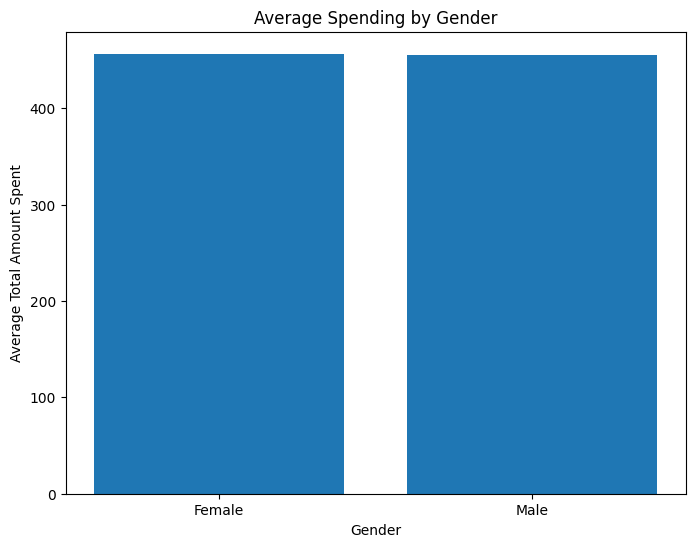

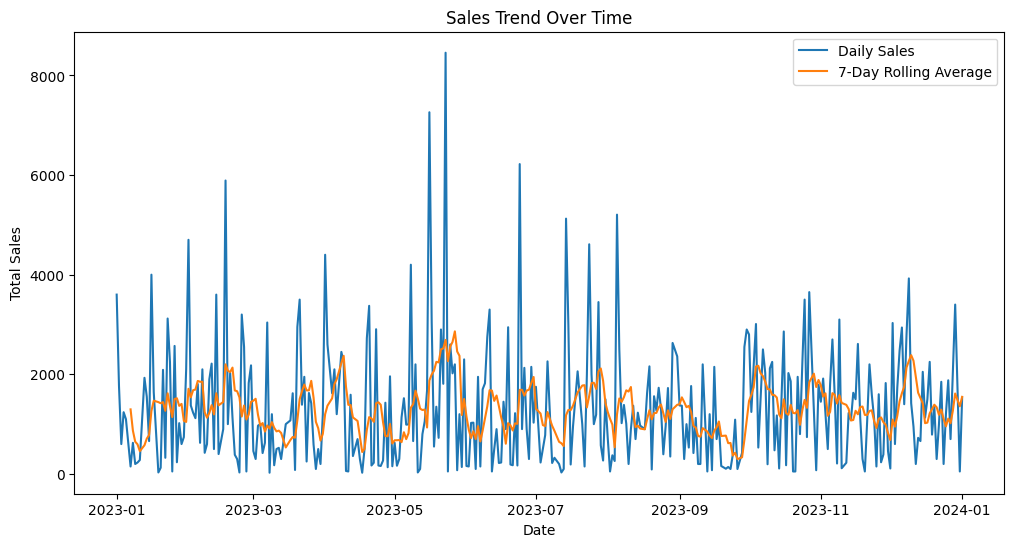

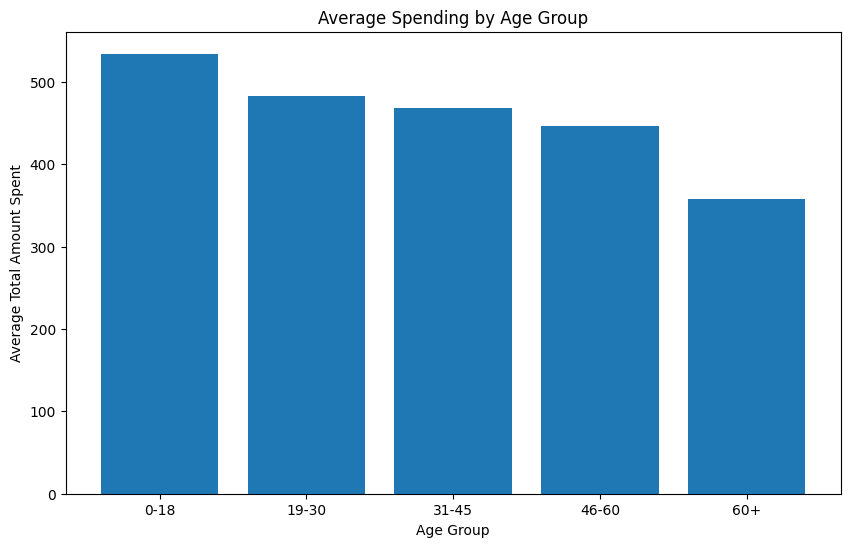

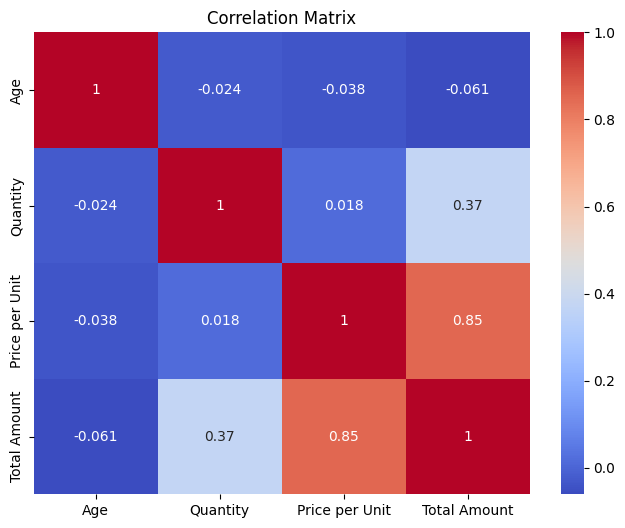

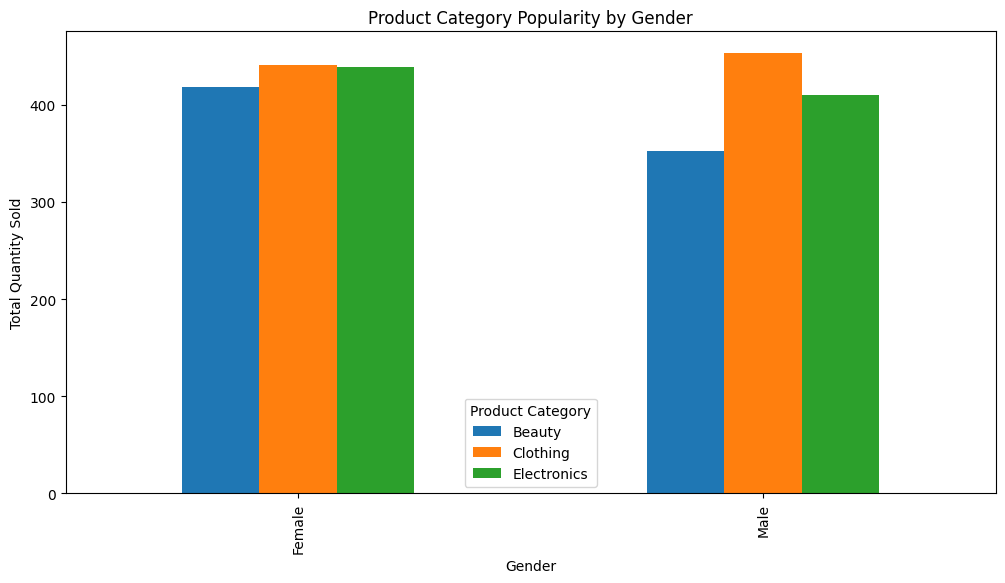

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Average spending by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_spending.index, gender_spending.values)
plt.xlabel('Gender')
plt.ylabel('Average Total Amount Spent')
plt.title('Average Spending by Gender')
plt.show()

# Line plot: Sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_avg, label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()


# Bar chart: Average spending by age group
plt.figure(figsize=(10, 6))
plt.bar(age_group_spending.index, age_group_spending.values)
plt.xlabel('Age Group')
plt.ylabel('Average Total Amount Spent')
plt.title('Average Spending by Age Group')
plt.show()

# Heatmap: Correlation matrix
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Bar chart: Product category popularity by gender
product_category_by_gender.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Gender')
plt.ylabel('Total Quantity Sold')
plt.title('Product Category Popularity by Gender')
plt.show()
